In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [22]:
# 데이터 불러오기
fp_df = pd.read_csv("시군별유동인구데이터.csv")

print("data shape:", fp_df.shape)
fp_df.info()
fp_df.head()

data shape: (85104, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85104 entries, 0 to 85103
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   년월               85104 non-null  int64  
 1   출발지(야간체류지) 시군코드  85104 non-null  int64  
 2   도착지 시군코드         85104 non-null  int64  
 3   10대남성 유입인구       85104 non-null  float64
 4   20대남성 유입인구       85104 non-null  float64
 5   30대남성 유입인구       85104 non-null  float64
 6   40대남성 유입인구       85104 non-null  float64
 7   50대남성 유입인구       85104 non-null  float64
 8   60대남성 유입인구       85104 non-null  float64
 9   70대남성 유입인구       85104 non-null  float64
 10  10대여성 유입인구       85104 non-null  float64
 11  20대여성 유입인구       85104 non-null  float64
 12  30대여성 유입인구       85104 non-null  float64
 13  40대여성 유입인구       85104 non-null  float64
 14  50대여성 유입인구       85104 non-null  float64
 15  60대여성 유입인구       85104 non-null  float64
 16  70대여성 유입인구       85104 non-null  f

,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
0,202001,11170,41590,19.15,64.28,116.56,136.39,118.72,45.84,13.68,23.83,52.79,67.96,51.08,33.53,26.28,16.03
1,202001,11170,41610,39.55,39.38,48.18,63.35,59.68,29.78,11.60,29.66,30.79,44.08,36.09,25.58,16.77,9.27
2,202001,11170,41630,30.51,21.78,29.73,38.39,37.38,21.49,7.53,21.10,12.57,21.77,24.48,25.13,17.43,11.46
3,202001,11170,41650,29.74,17.65,26.94,35.66,32.29,21.60,12.11,31.00,20.25,19.12,27.59,23.03,15.15,7.43
4,202001,11170,41670,9.37,8.90,21.12,17.89,22.00,10.84,2.60,14.36,16.70,21.71,15.95,11.51,8.15,4.50


In [23]:
# 데이터 전처리
destination = input(">>> 확인할 지역 입력: ")
gender = input(">>> 성별 입력 (남성 / 여성): ")
age = input(">>> 확인할 나이대 입력(숫자만 입력): ")
month = input(">>> 확인할 달 입력(예 : 2월 --> 02): ")

print("\n" + month+ "월 " + destination + "지역의 " + age + "대 " + gender + "들의 유동인구를 확인합니다")
check_column = age + '대' + gender + ' ' + '유입인구'
month= '2020' + month


08월 41550지역의 40대 남성들의 유동인구를 확인합니다


In [24]:
# DataFrame 핸들링
data = fp_df.loc[:, ['년월','출발지(야간체류지) 시군코드','도착지 시군코드',check_column]][fp_df['년월'] == int(month)]
data_simple = data[data['도착지 시군코드'] == int(destination)]
data_simple = data_simple.drop(['년월','도착지 시군코드'], axis=1)
data_simple['출발지'] = data_simple['출발지(야간체류지) 시군코드'] - (data_simple['출발지(야간체류지) 시군코드']%1000)
data_simple['출발지'] = data_simple['출발지']/1000
data_simple['출발지'] = data_simple['출발지'].astype(int)
data_simple=data_simple.drop('출발지(야간체류지) 시군코드',axis=1)
return_data = data_simple.groupby('출발지', as_index=False).sum()
return_data

,출발지,40대남성 유입인구
0,11,1338.59
1,26,88.14
2,27,81.27
3,28,402.61
4,29,51.29
5,30,164.13
6,31,25.94
7,36,46.19
8,41,22778.07
9,42,95.58


In [25]:
# 시군코드 - 도시명 연결
condition_list = [
    (return_data['출발지'] == 11),
    (return_data['출발지'] == 26),
    (return_data['출발지'] == 27),
    (return_data['출발지'] == 28),
    (return_data['출발지'] == 29),
    (return_data['출발지'] == 30),
    (return_data['출발지'] == 31),
    (return_data['출발지'] == 36),
    (return_data['출발지'] == 41),
    (return_data['출발지'] == 42),
    (return_data['출발지'] == 43),
    (return_data['출발지'] == 44),
    (return_data['출발지'] == 45),
    (return_data['출발지'] == 46),
    (return_data['출발지'] == 47),
    (return_data['출발지'] == 48),
    (return_data['출발지'] == 50)
]
city_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시',
               '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
               '경기도', '강원도', '충청북도', '충청남도', '전라북도',
               '전라남도', '경상북도', '경상남도', '제주특별자치도']

lat_list = [37.56, 35.16, 35.87, 37.46, 35.17, 36.37, 35.56, 36.25,
            37.59, 37.86, 36.63, 36.53, 35.72, 34.69, 36.55, 35.18, 33.57]

long_list = [126.90, 129.00, 128.53, 126.60, 126.80, 127.35, 129.28,
             127.24, 126.53, 127.68, 127.68, 126.51, 126.64, 125.93,
             129.28, 127.83, 126.29]

return_data['ADDR'] = np.select(condition_list, city_list, default='Not Specified')
return_data['lat'] = np.select(condition_list, lat_list, default='Not Specified')
return_data['long'] = np.select(condition_list, long_list, default='Not Specified')

return_data # 확인용 출력

,출발지,40대남성 유입인구,ADDR,lat,long
0,11,1338.59,서울특별시,37.56,126.9
1,26,88.14,부산광역시,35.16,129.0
2,27,81.27,대구광역시,35.87,128.53
3,28,402.61,인천광역시,37.46,126.6
4,29,51.29,광주광역시,35.17,126.8
5,30,164.13,대전광역시,36.37,127.35
6,31,25.94,울산광역시,35.56,129.28
7,36,46.19,세종특별자치시,36.25,127.24
8,41,22778.07,경기도,37.59,126.53
9,42,95.58,강원도,37.86,127.68


In [26]:
# 가공된 DataFrame 정렬
return_data_sorted = return_data.sort_values(by=[check_column], ascending=True)
return_data_sorted = return_data_sorted.reset_index()
return_data_sorted = return_data_sorted.drop('index', axis=1)
return_data_sorted #확인용 출력

,출발지,40대남성 유입인구,ADDR,lat,long
0,50,24.78,제주특별자치도,33.57,126.29
1,31,25.94,울산광역시,35.56,129.28
2,36,46.19,세종특별자치시,36.25,127.24
3,29,51.29,광주광역시,35.17,126.8
4,46,51.92,전라남도,34.69,125.93
5,27,81.27,대구광역시,35.87,128.53
6,26,88.14,부산광역시,35.16,129.0
7,42,95.58,강원도,37.86,127.68
8,47,103.79,경상북도,36.55,129.28
9,45,112.82,전라북도,35.72,126.64


In [27]:
# folium을 이용하여 지도 핸들링
map = folium.Map(location=[35.38, 127.51], zoom_start=6)

In [28]:
# Marker로 지도에 아이콘 표시
#for lat, long, addr, fp in zip(lat_list, long_list, return_data['ADDR'], return_data[check_column]):
#    folium.Marker(
#        location=[lat, long],
#        popup=(addr, fp),
#        icon=folium.Icon(color='red', icon='star')
#    ).add_to(map)
#map

In [29]:
# Circle Marker로 지도에 아이콘 표시
cnt=0

for lat, long, addr, fp in zip(lat_list, long_list, return_data['ADDR'], return_data[check_column]):
    cnt += 1
    folium.CircleMarker(
        location=[lat, long],
        radius=5 + cnt,
        fill=True,
        fill_opacity=0.3,
        popup=(addr, fp)
    ).add_to(map)

map

/Users/escortkwon/miniforge3/envs/Drill_ML/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/escortkwon/miniforge3/envs/Drill_ML/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/escortkwon/miniforge3/envs/Drill_ML/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/escortkwon/miniforge3/envs/Drill_ML/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/escortkwon/miniforge3/envs/Drill_ML/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0

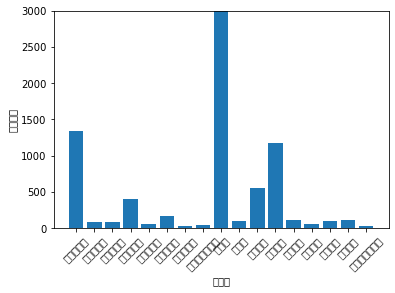

In [30]:
# Bar Plot 작성
plt.bar(return_data['ADDR'], return_data[check_column])

plt.xlabel('출발지')
plt.xticks(rotation=45)
plt.ylabel('유동인구')
plt.ylim(0, 3000)

plt.show()

In [31]:
# DataFrame --> csv 변환
# return_data.to_csv('C:/Users/ggh99/PycharmProjects/Advanced_AI_Course/1st_week/Dataset/address/address_generated.csv',
#                  sep=',',
#                  encoding='CP949')

In [32]:
# coordinates = pd.read_csv('Dataset/address/address_transform.utf-8.csv')
# len(coordinates) # 확인용 출력

In [33]:
map_SK = folium.Map(location=[36.38, 127.51], zoom_start=6.5) # location: 남한 중심 좌표, zoom_start 수치가 클수록 확대
# Marker로 지도에 아이콘 표시
for lat, long, add in zip(coordinates['위도'], coordinates['경도'], coordinates['ADDR']):
    folium.Marker(
        location=[lat, long],
        popup=add,
        icon=folium.Icon(color='red', icon='city')

    ).add_to(map_SK)
map_SK

NameError: name 'coordinates' is not defined

In [ ]:
from folium.plugins import MarkerCluster # MarkerCluster를 이용하면 가까운 거리의 Marker들을 군집시켜서 해당 건수를 표현

def draw_map(df):
    # 지도 생성
    map_fn = folium.Map(location=[36.38, 127.51], zoom_start=6.5)
    # 리스트를 이용해 여러 행의 데이터를 위, 경도로 묶음
    locations = list(zip(df['위도'], df['경도']))
    locations_city = list(zip(coordinates['위도'], coordinates['경도']))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 도시 아이콘 표시
    icons = [folium.Icon(icon='city', color='red') for _ in range(len(locations_city))]
    # 반복문을 이용해 아이콘을 클릭했을 때, popup 생성
    for addr in df['ADDR']:
        folium.Marker(popup=addr)

    # cluster 생성
    cluster = MarkerCluster(locations=locations, icons=icons)
    # 지도에 cluster 추가
    cluster.add_to(map_fn)
    # 지도 출력
    print(map_fn)
    map_fn.save('./map_fn.html')

# 함수 실행
draw_map(coordinates)

In [ ]:
# 지도 위에 울산대학교 표시
UOU = folium.Map(location=[35.5450147, 129.2528426], min_zoom=5, max_zoom=8)
folium.Marker(
        location=[35.5450147, 129.2528426],
        popup='University of Ulsan',
        icon=folium.Icon(color='red', icon='star')).add_to(UOU)
UOU